Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("baseball.csv")
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


here info gives data type and not null value

In [3]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

Here we get the columns value of the datasets

In [8]:
df.shape

(30, 17)

in our dataset we have 30 rows and 17 columns

In [4]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [ ]:
Here we get all the statistics assumption for the data set.Like max,min,1st quartile,2nd quartile etc value.

In [10]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

here we can see we dont have any null value in our dataset

<AxesSubplot:>

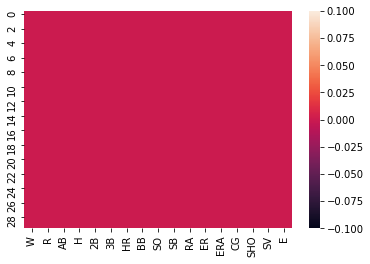

In [13]:
sns.heatmap(df.isnull())

Using heatmap we can also check null values

In [16]:
df['W'].unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

In our dataset we have W(target).So we can see unique value present here.

In [17]:
df['W'].value_counts()

68     3
83     2
74     2
76     2
81     2
64     1
93     1
92     1
90     1
88     1
87     1
86     1
85     1
84     1
80     1
97     1
100    1
78     1
63     1
79     1
71     1
67     1
98     1
95     1
Name: W, dtype: int64

In [ ]:
Here we can see the count of target variable

# Data Visualisation

<AxesSubplot:xlabel='W', ylabel='count'>

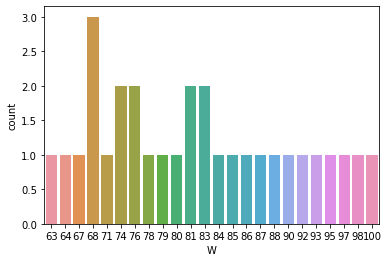

In [18]:
sns.countplot(df['W'])

Here we can see different unique values of W.And This graph also show us at 68 is the highest,74,76,81,83 is the second highest with same no. of count.and all others are columns are with same count value 

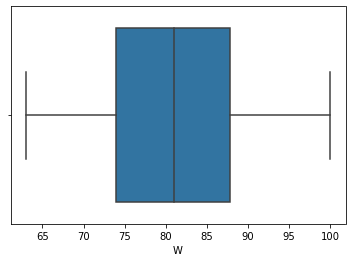

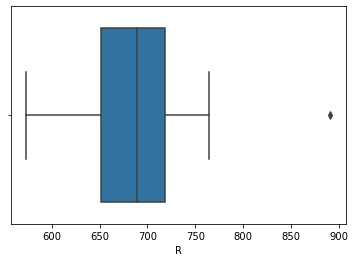

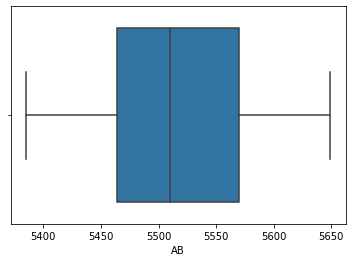

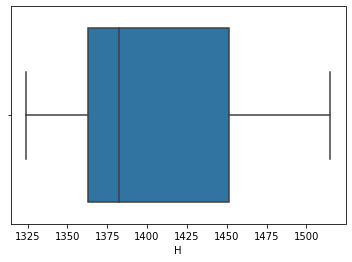

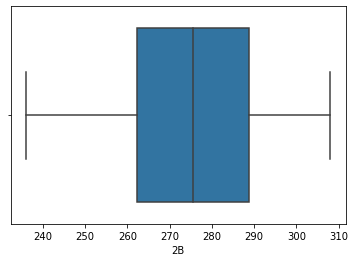

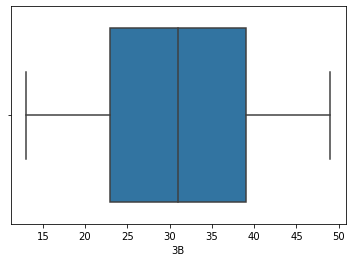

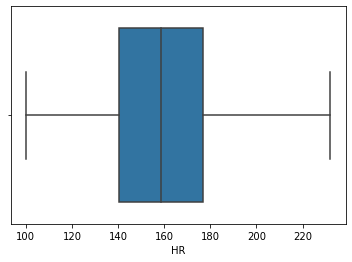

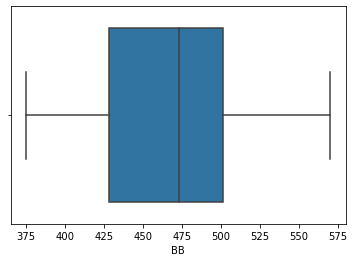

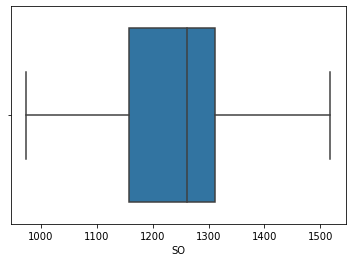

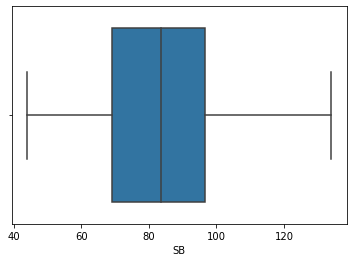

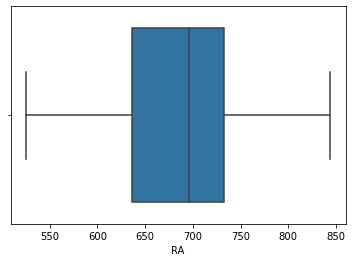

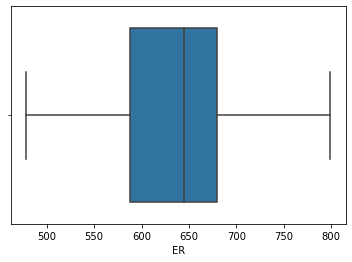

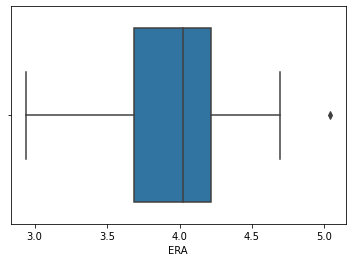

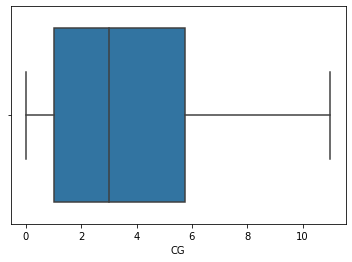

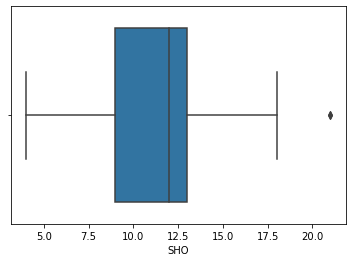

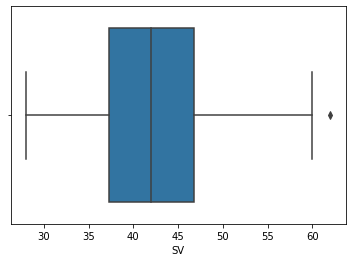

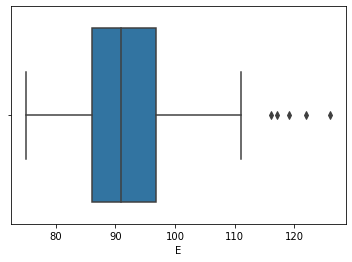

In [21]:
for i in df.describe().columns:
    sns.boxplot(df[i])
    plt.show()

using box plot we can see the outliers present in our datasets.So,here we observed that we have many columns which has no outliers and also in R,ERA,SHO,SV have few outliers but E have many outliers in that.So,we have to remove it orelse it can affecet our datasets

In [23]:
sns.pairplot(df,hue="W",height = 8)

Pairplot shows the outliers and skewness of target and feature column.We observed that many values are scattered.

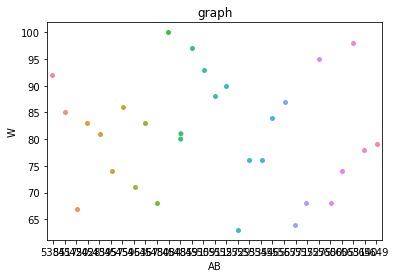

In [27]:
ax=sns.stripplot(x="AB",y="W",data=df)
plt.title("graph")
plt.show()

In our data set we can see that AB is having highest value so when we checked AB value with target value we observed our data is very much scattered in all the directions. But mostly values are scattered in between

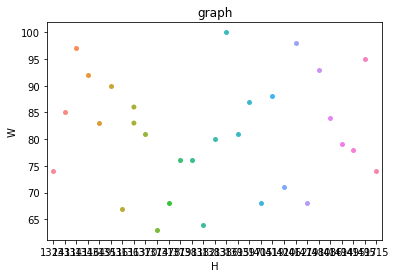

In [29]:
ax=sns.swarmplot(x="H",y="W",data=df)
plt.title("graph")
plt.show()

H is the second highest value.So,here also we can see that it is also scattered in all the direction.But mostly in between

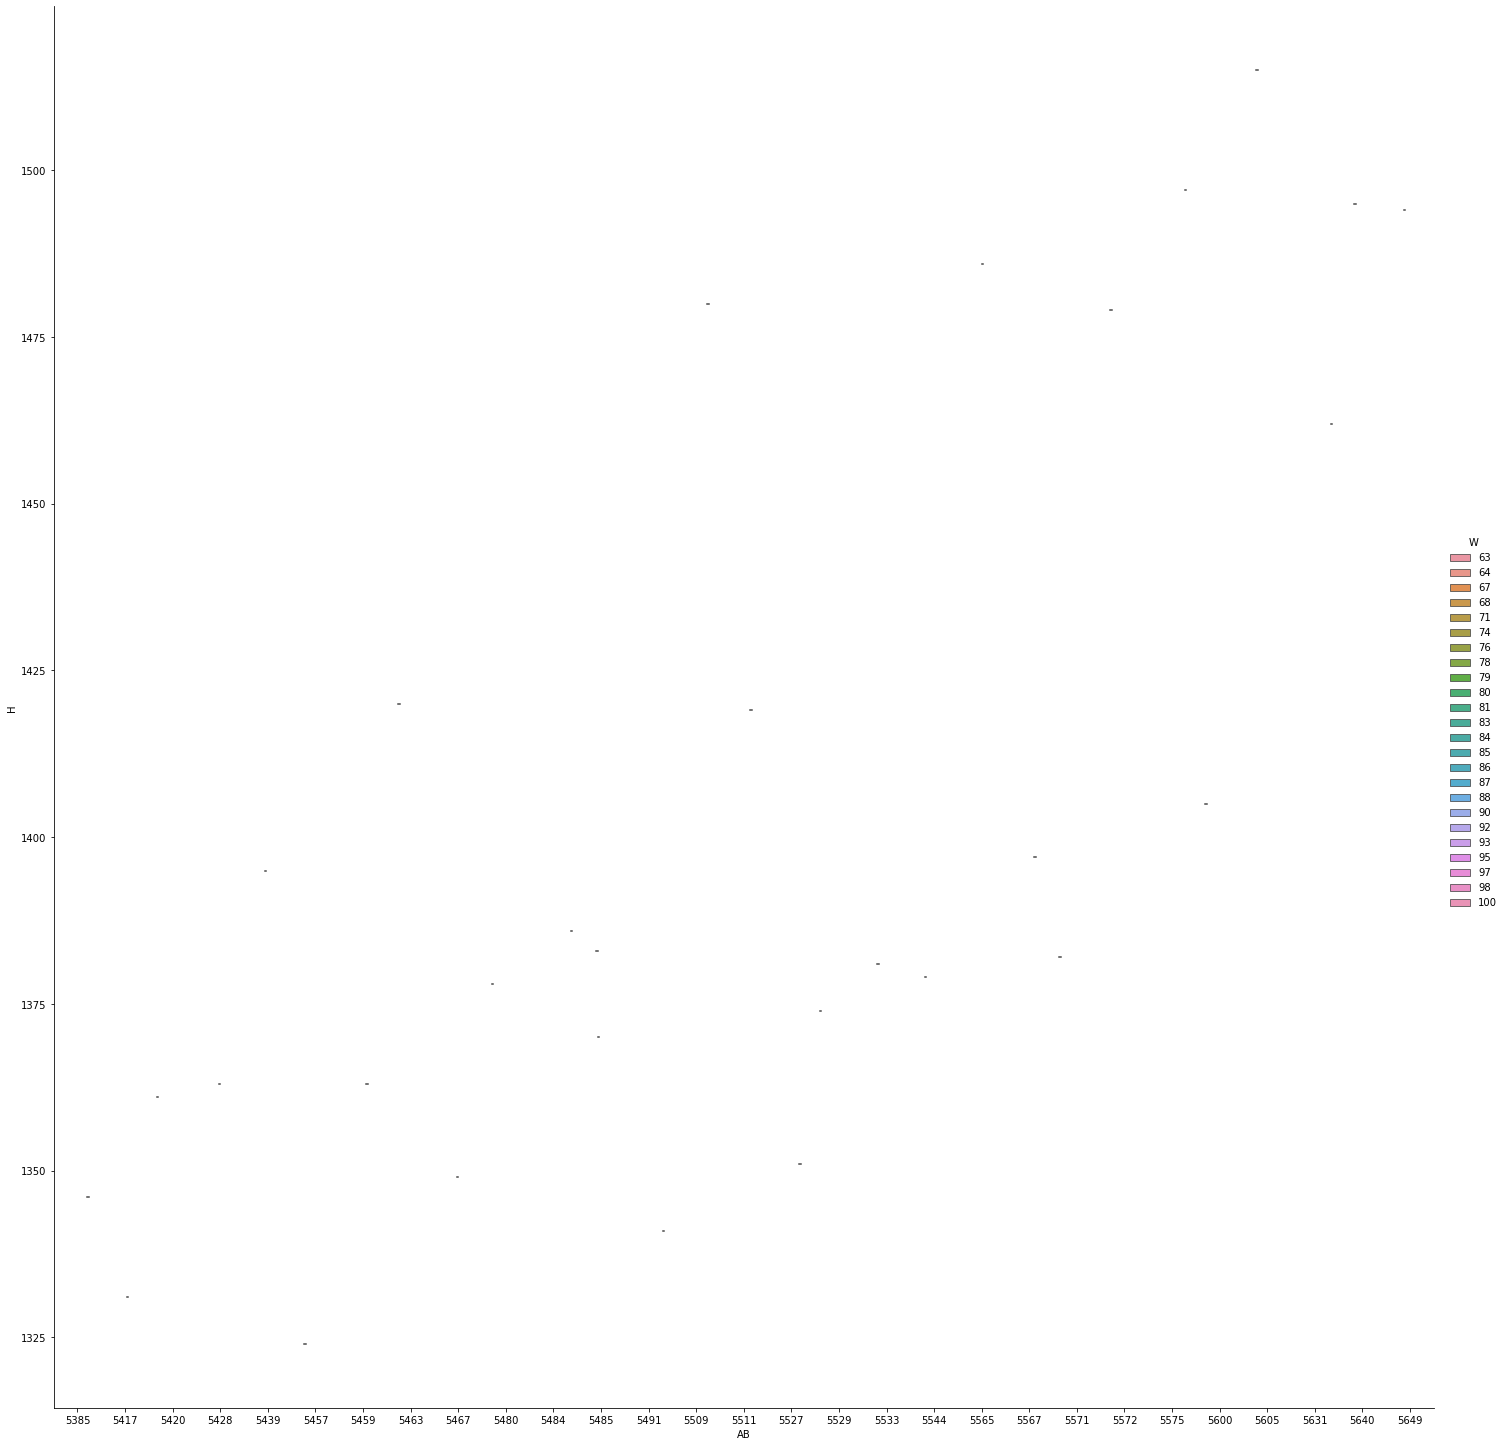

In [32]:
#Set up a category plot
g=sns.catplot(x="AB", y = "H",hue="W",data=df,kind="violin",height=20)
#show plot
plt.show()

AB,H is having highest value in feature so comparing in with target(w) we observed that it scattered in all the direction.And also saw that value is reaching more than 1500

array([<AxesSubplot:title={'center':'W'}>,
       <AxesSubplot:title={'center':'R'}>,
       <AxesSubplot:title={'center':'AB'}>,
       <AxesSubplot:title={'center':'H'}>,
       <AxesSubplot:title={'center':'2B'}>,
       <AxesSubplot:title={'center':'3B'}>,
       <AxesSubplot:title={'center':'HR'}>,
       <AxesSubplot:title={'center':'BB'}>,
       <AxesSubplot:title={'center':'SO'}>,
       <AxesSubplot:title={'center':'SB'}>,
       <AxesSubplot:title={'center':'RA'}>,
       <AxesSubplot:title={'center':'ER'}>,
       <AxesSubplot:title={'center':'ERA'}>,
       <AxesSubplot:title={'center':'CG'}>,
       <AxesSubplot:title={'center':'SHO'}>,
       <AxesSubplot:title={'center':'SV'}>,
       <AxesSubplot:title={'center':'E'}>], dtype=object)

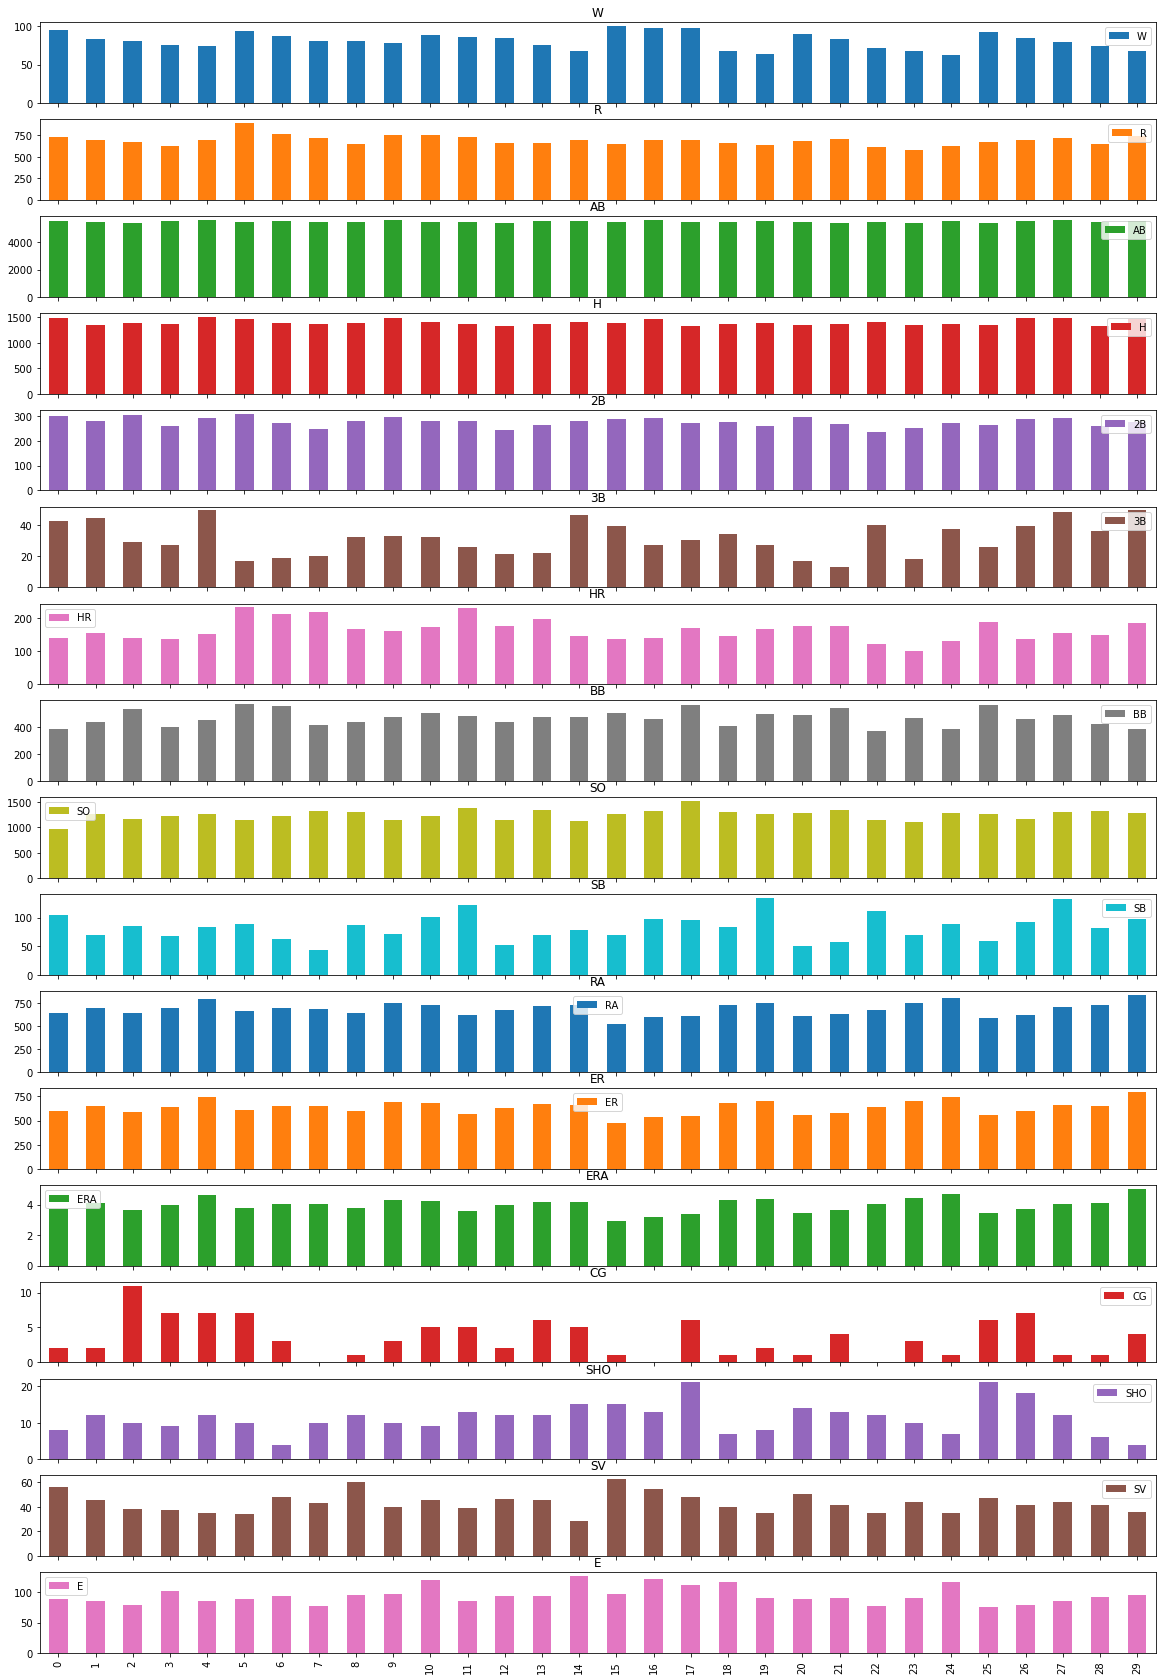

In [33]:
df.plot.bar(subplots= True,stacked= False, figsize=(20,30))

Here using this plot ,we can observe the data in each column like which is having more value or least

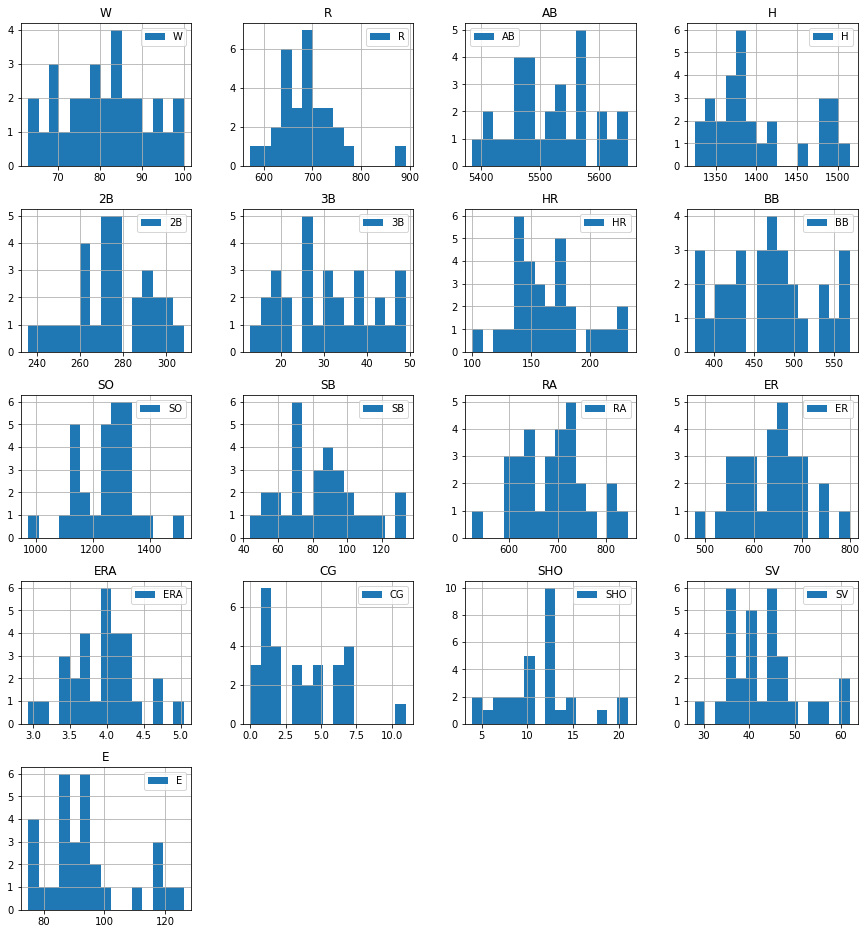

In [34]:
df.hist(figsize=(15,30),layout=(9,4),bins=15,legend=True)
plt.show()

Here in the graph W shows more values and CG is havong gap between 7.5-10.Compare to other it has more gap

<AxesSubplot:xlabel='W', ylabel='R'>

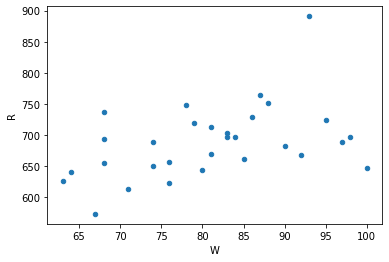

In [35]:
df.plot.scatter(x='W',y='R')

with comparision of feature with target we an see how much data is scattered. Here we can see till 900 value are scattered but least.Between 650-750.Its scattered more

<AxesSubplot:xlabel='R', ylabel='AB'>

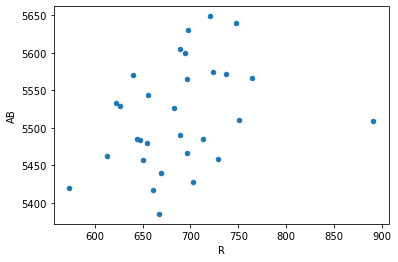

In [36]:
df.plot.scatter(x='R',y='AB')

with comparision of feature with target we an see how much data is scattered.At last value is more scattered and more in between 600-750

<AxesSubplot:xlabel='W', ylabel='R'>

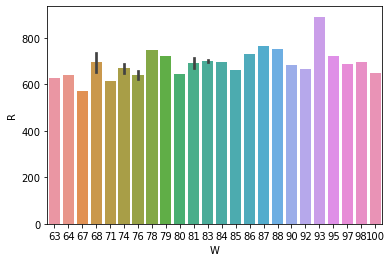

In [38]:
sns.barplot(data=df, x="W", y="R")

Here we can see 93 is having more count and 67 the least

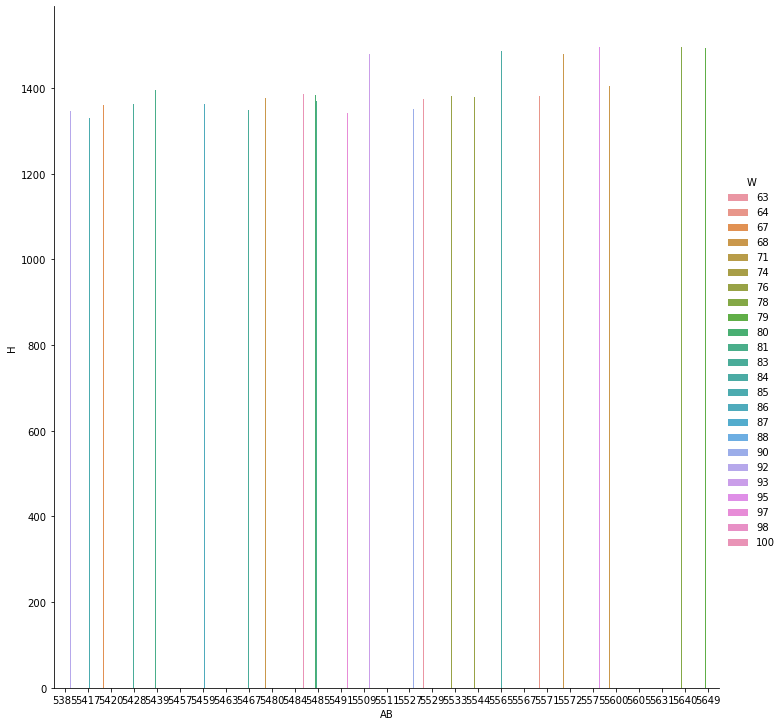

In [41]:
#Set up a category plot
g=sns.catplot(x="AB", y = "H",hue="W",data=df,kind="bar",height=10)
#show plot
plt.show()

Here we can see 91550 is having more values

<AxesSubplot:xlabel='E', ylabel='SV'>

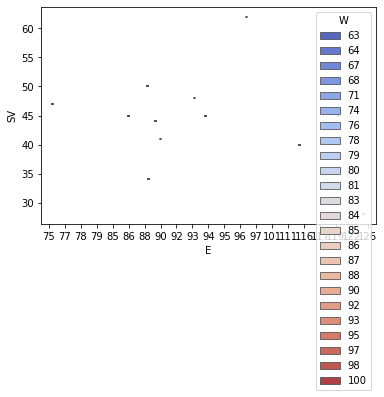

In [43]:
sns.boxplot(x="E", y = "SV",hue="W",data=df,palette="coolwarm")

here value is scattered til 60 and more in between 30-50

<AxesSubplot:xlabel='2B', ylabel='3B'>

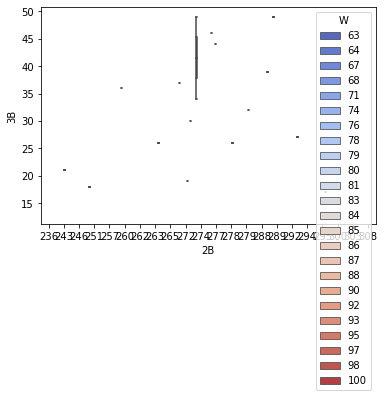

In [46]:
sns.boxplot(x="2B", y = "3B",hue="W",data=df,palette="coolwarm")

here value is scattered til 50 and more in between 20-40

<AxesSubplot:xlabel='W', ylabel='Density'>

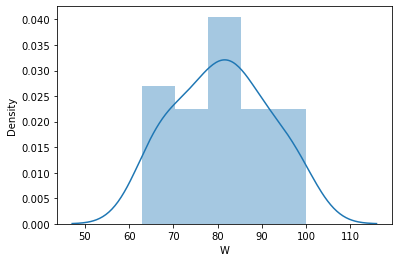

In [47]:
sns.distplot(df["W"])

We can see that it is almost normally distributed and very less skewness will be aviable

<AxesSubplot:xlabel='AB', ylabel='Density'>

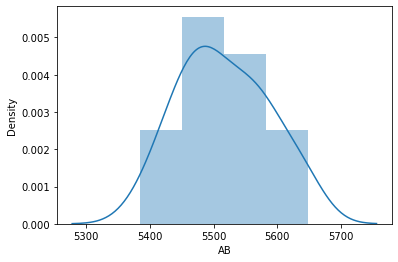

In [49]:
sns.distplot(df["AB"])

We can see that it is almost normally distributed and very less skewness will be aviable

<AxesSubplot:xlabel='H', ylabel='Density'>

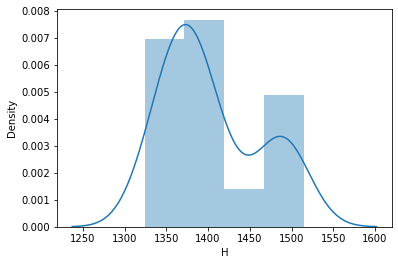

In [6]:
sns.distplot(df["H"])

We can see that it is not normally distributed and very much skewness will be aviable

<AxesSubplot:xlabel='R', ylabel='Density'>

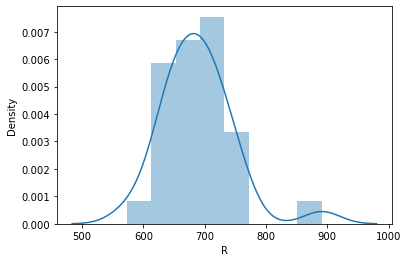

In [7]:
sns.distplot(df["R"])

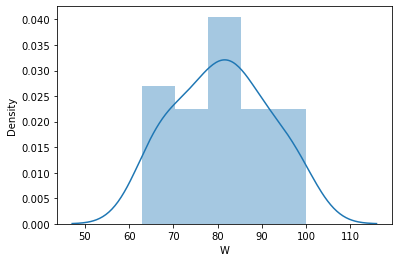

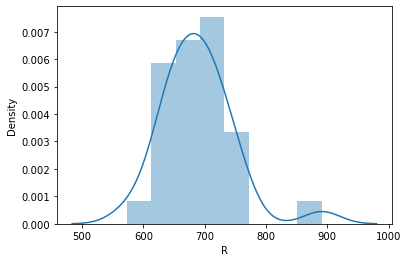

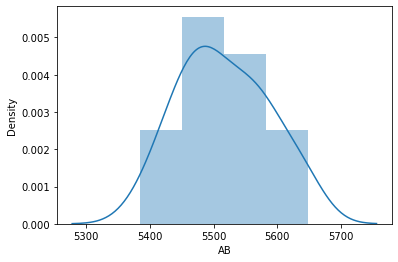

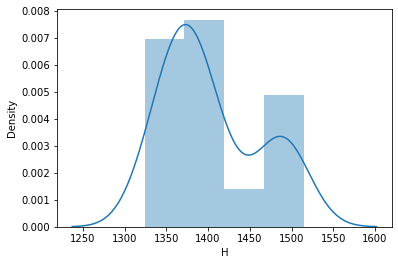

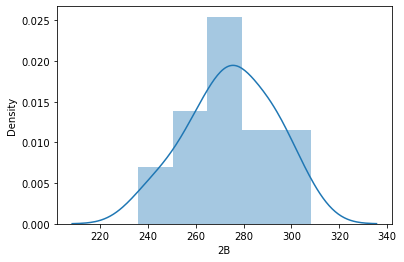

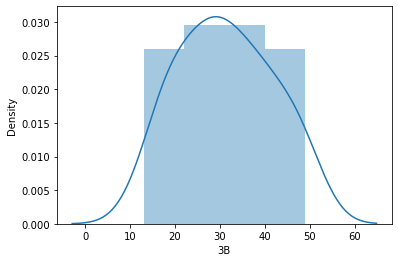

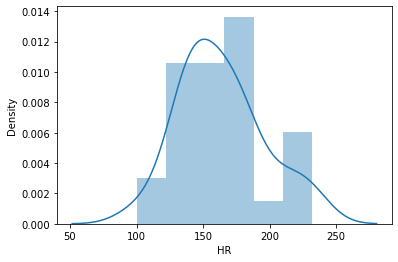

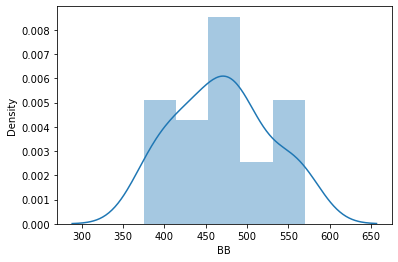

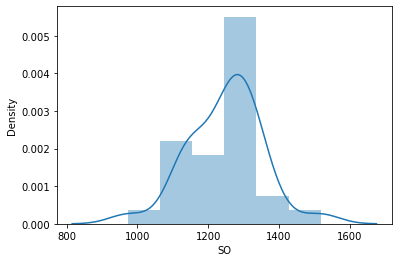

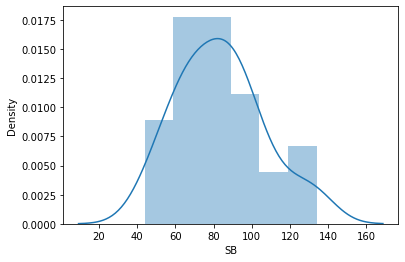

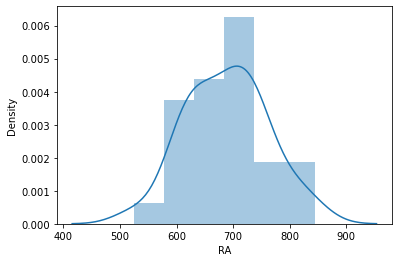

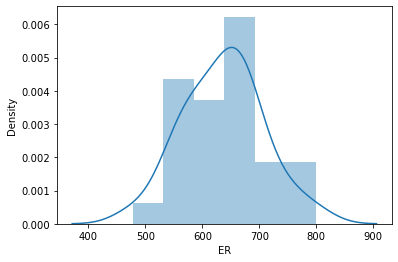

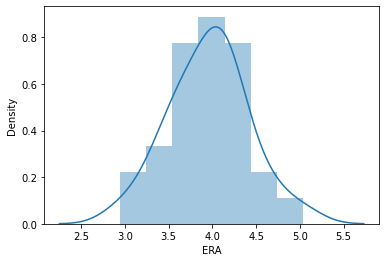

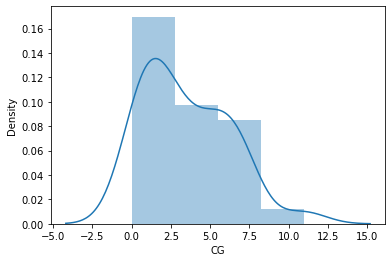

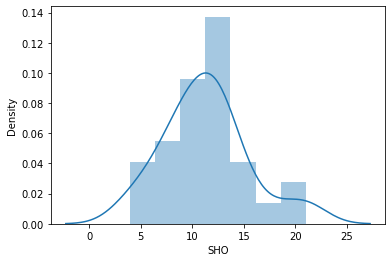

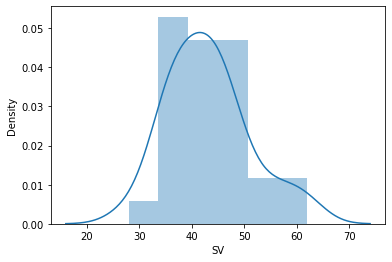

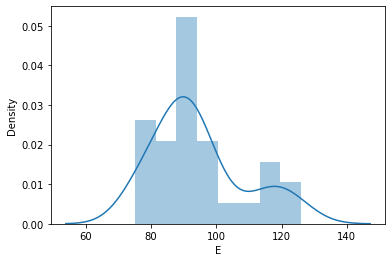

In [9]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i])

Here we can see thst few are normally distributed and many are not normally distributed.Because of that we have to remove skewness

# Correlation checking

In [4]:
cor=df.corr()
cor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


It gives the correlation of each variable with every other variable.

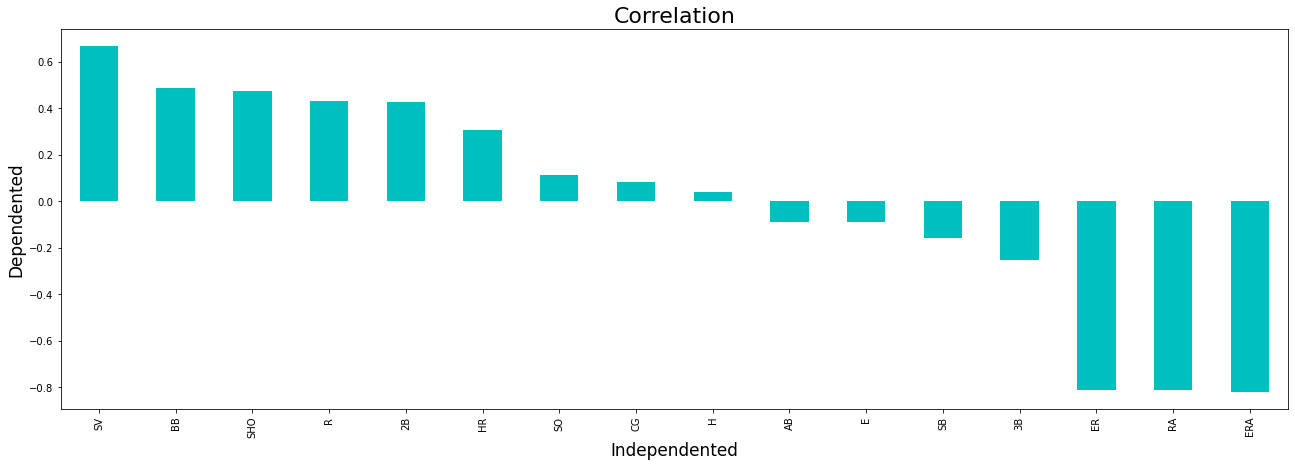

In [12]:
plt.figure(figsize=(22,7))
cor['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color='c')
plt.ylabel('Dependented',fontsize=17)
plt.xlabel('Independented',fontsize=17)
plt.title('Correlation',fontsize=22)
plt.show()

Here we can see that SV is compelety a postive correlation and then BB,SHO,R,2B,HR is dramactically decresing 
From AB the value is going towards negative correlation

<AxesSubplot:>

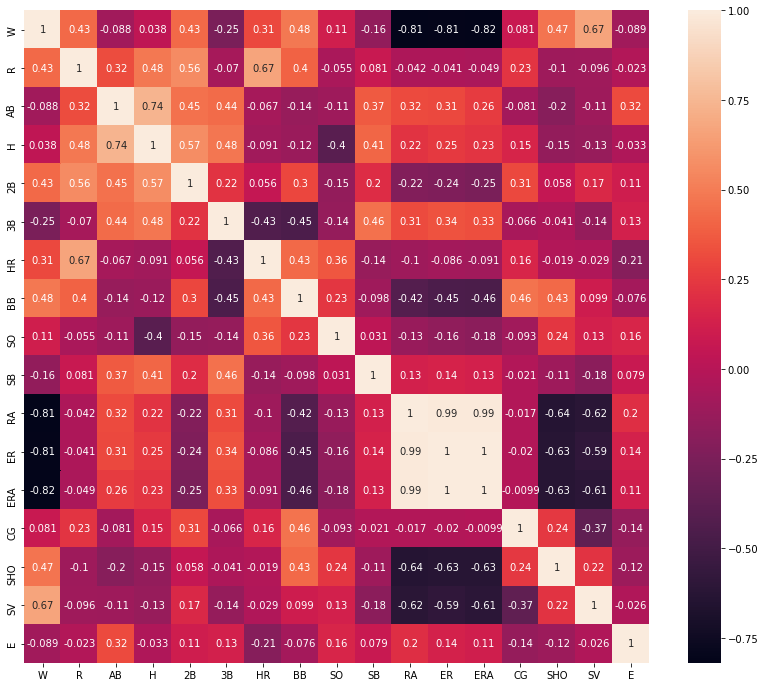

In [5]:
plt.figure(figsize=(14,12))
sns.heatmap(cor,annot=True)

heatmap show us which is more correlated which each other.Here we can see AB-H is 74% correlated with each other.which is the highest

In [10]:
from scipy.stats import zscore
z=zscore(df)
z

array([[ 1.36540860e+00,  6.19077968e-01,  8.47731264e-01,
         1.66368512e+00,  1.42017307e+00,  1.04119304e+00,
        -7.87298598e-01, -1.53490242e+00, -2.69762957e+00,
         9.13883291e-01, -6.66233927e-01, -5.05110079e-01,
        -5.06955186e-01, -5.39806195e-01, -8.14628593e-01,
         1.67160651e+00, -4.61469635e-01],
       [ 1.97838300e-01,  1.34431656e-01, -7.11093535e-01,
        -9.70680764e-01,  1.27403389e-01,  1.23580856e+00,
        -2.43966683e-01, -5.36591904e-01,  1.54878442e-01,
        -6.01825582e-01,  1.65970766e-01,  2.48929848e-01,
         2.54597523e-01, -5.39806195e-01,  1.72800005e-01,
         2.49879323e-01, -6.07196888e-01],
       [ 3.24325082e-03, -3.32905860e-01, -1.11523330e+00,
        -1.51891367e-01,  1.58879521e+00, -2.23807850e-01,
        -7.23377196e-01,  1.13914361e+00, -8.93981893e-01,
         1.11449182e-01, -6.80339091e-01, -7.51623132e-01,
        -6.41346840e-01,  2.77264091e+00, -3.20914294e-01,
        -6.54856158e-01, -1.1

In [11]:
new_df= df[(z < 3).all(axis=1)]

In [12]:
new_df.shape

(29, 17)

In [13]:
df.shape

(30, 17)

In [14]:
29/30

0.9666666666666667

here we can see only 1% value is changed so we can  use it for building our model

In [15]:
new_df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [ ]:
Here we can see approximately skweeness is removed .So we can use this new df value

In [16]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
for x in new_df.columns:
    new_df[x]=sc.fit_transform(new_df[x].values.reshape(-1,1))
new_df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,1.416025,0.959398,0.830084,1.738306,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.501486,-0.813262,1.643157,-0.471091
1,0.239947,0.331147,-0.702831,-0.938698,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.501486,0.159299,0.211006,-0.614898
2,0.043934,-0.274666,-1.100253,-0.106656,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,2.854612,-0.326982,-0.700362,-1.118222
3,-0.446099,-1.329231,0.233951,-0.359886,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.363013,-0.570122,-0.830557,0.463653
4,-0.642112,0.174084,1.255894,2.063888,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.363013,0.159299,-1.090948,-0.614898


In [17]:
#Spliting the data
x=new_df.drop('W',axis=1)
y=new_df['W']

In [25]:
y.shape

(29,)

we have 29 rows in the target column

# Modeling Building

In [18]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [19]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is: {r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is: {r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is: 0.979301718690075
At random state 0, The test accuracy is: 0.37642412024128424


At random state 1, The training accuracy is: 0.96935160044487
At random state 1, The test accuracy is: 0.7555241414909619


At random state 2, The training accuracy is: 0.9664881232216761
At random state 2, The test accuracy is: -0.329290924990405


At random state 3, The training accuracy is: 0.9534657143080716
At random state 3, The test accuracy is: 0.8485894004113622


At random state 4, The training accuracy is: 0.9611298547801513
At random state 4, The test accuracy is: 0.7514775069642629


At random state 5, The training accuracy is: 0.9617989022273269
At random state 5, The test accuracy is: 0.5545096693427471


At random state 6, The training accuracy is: 0.960321770783518
At random state 6, The test accuracy is: 0.7473255183245231


At random state 7, The training accuracy is: 0.9590946505307435
At random state 7, The test accuracy is: 0.40437495641437

random state=99 giving highest accuracy.So,we will choose that as random state

In [20]:
#splitting the data into 78% training and 22% testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=99)

In [21]:
#Linear Regression
from sklearn.linear_model import LinearRegression
Lr=LinearRegression()
Lr.fit(x_train, y_train)
pred_test=Lr.predict(x_test)
print(r2_score(y_test,pred_test))

0.8473754088703301


In [33]:
from sklearn.model_selection import cross_val_score
cv_score= cross_val_score(Lr, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.03762866049631495

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

parameters = {'alpha' :[.0001, .001, .01, .1, 1, 10], 'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [36]:
ls = Lasso(alpha = 0.1, random_state=0)
ls.fit(x_train, y_train)
ls.score(x_train, y_train)
pred_ls = ls.predict(x_test)

laso = r2_score(y_test, pred_ls)
laso

0.8700891759362657

In [38]:
cv_score= cross_val_score(ls, x,y, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.4132403894416843

In [39]:
#Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

dtree = DecisionTreeRegressor()
dtree.fit(x_train, y_train)
pred_dtree = dtree.predict(x_test)
print(r2_score(y_test,pred_dtree))

0.3629663056558362


In [41]:
cv_score= cross_val_score(dtree, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

-2.1524949403555214

In [42]:
#Random Forest Regression

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters ={'criterion':['mse', 'mae'], 'max_features':["auto","sqrt","log2"]}
Rfr= RandomForestRegressor()
clf =GridSearchCV(Rfr, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [44]:
Rfr =RandomForestRegressor(criterion = "mae", max_features="auto")
Rfr.fit(x_train, y_train)
Rfr.score(x_train, y_train)
pred_decision = Rfr.predict(x_test)

Rfrs = r2_score(y_test,pred_decision)
print('R2 Score: ',Rfrs*100)

Rfrscore = cross_val_score(Rfr, x,y, cv=3)
Rfrc = Rfrscore.mean()
print('Cross Val Score: ',Rfrc*100)

R2 Score:  61.538874849578804
Cross Val Score:  -14.010880174577952


In [51]:
#SVR for linear
from sklearn.svm import SVR
svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
svr_predict=svr.predict(x_test)
print('MSE:',mean_squared_error(svr_predict,y_test))
print('MAE:',mean_absolute_error(svr_predict,y_test))
print('r2_score:',r2_score(svr_predict,y_test))

SVRlinear = cross_val_score(svr, x,y, cv=3)
SVRlinear = SVRlinear.mean()
print('Cross Val Score: ',SVRlinear*100)

0.9159955699414937
MSE: 0.09789617391144767
MAE: 0.26599506627899877
r2_score: 0.9169997077514305
Cross Val Score:  36.49678978641058


In [53]:
#SVR for poly
SVR(kernel='poly')
svr_p=SVR(kernel='poly')
svr_p.fit(x_train,y_train)
print(svr_p.score(x_train,y_train))
svrpred_p=svr_p.predict(x_test)
print('MSE:',mean_squared_error(svrpred_p,y_test))
print('MAE:',mean_absolute_error(svrpred_p,y_test))
print('r2_score:',r2_score(svrpred_p,y_test))

SVRpoly = cross_val_score(svr, x,y, cv=3)
SVRpoly = SVRpoly.mean()
print('Cross Val Score: ',SVRpoly*100)

0.8832251954523962
MSE: 0.6170235855173735
MAE: 0.6664109025627694
r2_score: -1.8192018626526232
Cross Val Score:  36.49678978641058


In [54]:
#SVR for rbf
SVR(kernel='rbf')
svr_r=SVR(kernel='rbf')
svr_r.fit(x_train,y_train)
print(svr_r.score(x_train,y_train))
svrpred_r=svr_r.predict(x_test)
print('MSE:',mean_squared_error(svrpred_r,y_test))
print('MAE:',mean_absolute_error(svrpred_r,y_test))

SVRrbf = cross_val_score(svr, x,y, cv=3)
SVRrbf = SVRrbf.mean()
print('Cross Val Score: ',SVRrbf*100)

0.9235395645612255
MSE: 0.5551474071580427
MAE: 0.6480522884007373
Cross Val Score:  36.49678978641058


Accourding to differnce between accuracy score and cross val score is low in the LinearRegression.So,thats why we are selecting as final model

# HYPER PARAMETER TUNING:

In [56]:
from sklearn.model_selection import GridSearchCV
LR=LinearRegression()
Parameters={
    'fit_intercept':[True,False],
    'copy_X':[True],
    'n_jobs':[-1],
   'positive' : [True],
}
GCV=GridSearchCV(LinearRegression(),Parameters,cv=5)
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True], 'fit_intercept': [True, False],
                         'n_jobs': [-1], 'positive': [True]})

In [57]:
GCV.best_params_ # printing the best parameters found by GridSearchCV

{'copy_X': True, 'fit_intercept': False, 'n_jobs': -1, 'positive': True}

In [58]:
mod = LinearRegression( copy_X=True, fit_intercept= False , n_jobs=-1, positive=True)
mod.fit(x_train, y_train)
pred =mod.predict(x_test)
print(r2_score(y_test, pred)*100)

85.60588535521583


so we cann see our best model which we found using LinearRegression is 85% accurate

In [22]:
import joblib
joblib.dump(Lr,"Final_Baseball_Case_Study.pkl")

['Final_Baseball_Case_Study.pkl']

# Saving ur best Model at the end